In [59]:
#Myan Sudharsanan, Jeremy Stiava, Reedham Kalariya
#Final Project Implementation

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [64]:
df = pd.read_csv('./winequality-red.csv', sep=';')


#df=df.drop(columns=['pH','sulphates','density'])

scaler = StandardScaler()

#df=pd.DataFrame(scaler.fit_transform(df))



df.var(0)

#how many instances within quality 5 or quality 6

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [65]:
df=df.drop(columns=['pH','sulphates','density','volatile acidity','citric acid','chlorides'])


In [66]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

clf_space = dict()

# clf_space['n_estimators'] = [100, 150, 200, 250]

# clf_space['criterion'] = ['gini', 'entropy', 'log_loss']

# clf_space['max_depth'] = [9, 10, 11, 12, 13, 14, 15]

# clf_space['max_features'] = ['sqrt', 'log2', None]

# clf_space['class_weight'] = ['balanced', 'balanced_subsample']

#pca = PCA(n_components=3)

#X_reduced = pca.fit_transform(X)

#feature_importances = pca.components_.T
#important_features = np.argsort(np.abs(feature_importances), axis=0)[-2:]
#important_features = important_features[::-1]

#X_new = X[:, important_features.ravel()[:][1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train and evaluate your model


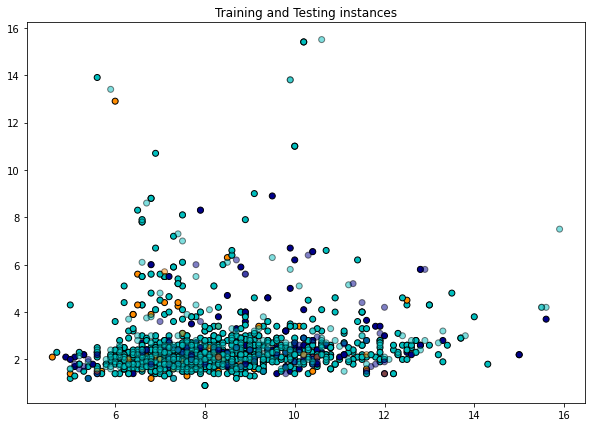

In [67]:
import matplotlib.colors as colr
figr = plt.figure(figsize = (10,7))
cmap_bold = colr.ListedColormap(['darkorange', 'c', 'darkblue'])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold, edgecolor='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap_bold, alpha=0.5, edgecolor='k')
plt.title('Training and Testing instances')
plt.show()

In [68]:
clf = RandomForestClassifier()

# pipeline = Pipeline([
#     ('scaler', scaler),
#     ('classifier', clf)
# ])
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("rf",RandomForestClassifier())])

param_grid = {
#     'rf__max_depth': [4, 5, 10],
#     'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
#     'rf__n_estimators': [100, 200, 300]
    
    
    'rf__n_estimators' : [100, 150, 200, 250],

    'rf__criterion' : ['gini', 'entropy', 'log_loss'],

    'rf__max_depth' : [9, 10, 11, 12, 13, 14, 15],

    'rf__max_features' : ['sqrt', 'log2', None],

    'rf__class_weight' : ['balanced', 'balanced_subsample']
}


search = GridSearchCV(pipeline, param_grid,cv=5)

#clf.fit(X_train, y_train)

#clf.score(X_test, y_test)

#y_pred=clf.predict(X_test)

#mean_squared_error(y_pred, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
result = search.fit(X_train, y_train)

#clf.score(X_test, y_test)

In [70]:
accuracy_score(y_test, search.predict(X_test))

0.5791666666666667

<ipython-input-73-25e0cbc5f8a8>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


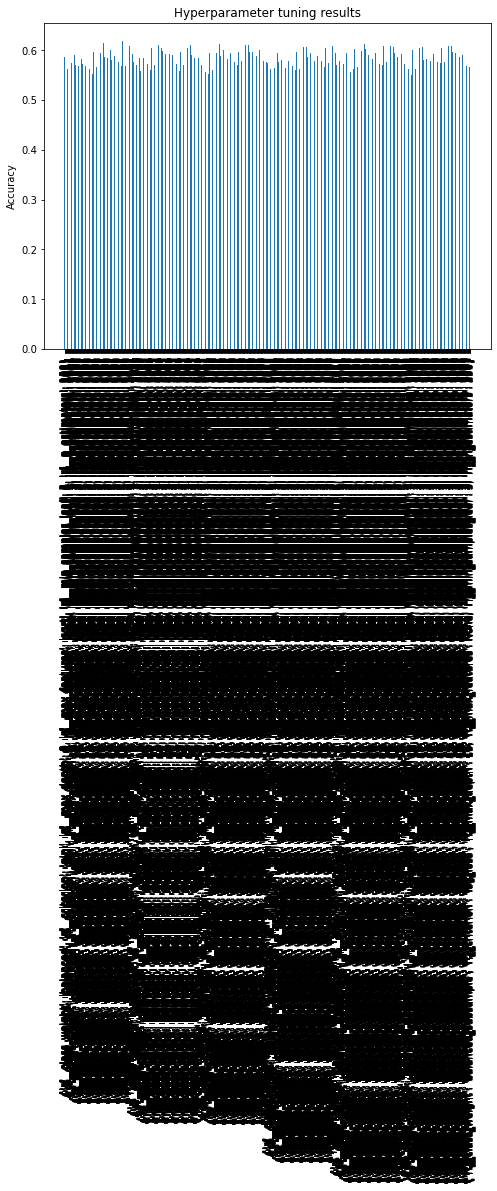

In [73]:
# Extract the scores and hyperparameters
scores = result.cv_results_['mean_test_score']
params = result.cv_results_['params']

# Plot the scores for each hyperparameter combination
n_params = len(params)
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(n_params)
width = 0.35

rects1 = ax.bar(x - width/2, scores, width)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter tuning results')
ax.set_xticks(x)
ax.set_xticklabels(params, rotation=90)

plt.tight_layout()
plt.show()

# PCA
Define a pipeline to search for the best combination of PCA truncation
and classifier regularization.
pca = PCA()
set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [74]:
#We considered PCA for a moment too but since it is an unsupervised techqniue for feaature extraction, we thought it would not be helpful unless
#we find any strong correlation between other features or inter-correlation. This is just our reference code on how to pipeline our standardization
# of the data and run the data through the model for hyperparamterization, particulary with Cross-Validation to avoid overfitting of data into 
# the model as much as possible.

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
# pca = PCA()
# set the tolerance to a large value to make the example faster
# logistic = LogisticRegression(max_iter=10000, tol=0.1)
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
#param_grid = {
    #'pca__n_components': [5, 15, 30, 45, 64],
    #'logistic__C': np.logspace(-4, 4, 4),
#}
#search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#search.fit(X_digits, y_digits)
#print("Best parameter (CV score=%0.3f):" % search.best_score_)
#print(search.best_params_)

# KNN

Knn algorithm and plots

In [75]:
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("knn",KNeighborsClassifier())])

knn_param_grid = {
    'knn__n_neighbors' : [4,5,6,7,8,9],
    'knn__weights' : ['uniform','distance'],
    'knn__algorithm' : ['auto','ball_tree','kd_tree','brute']
}

knn = GridSearchCV(pipeline, knn_param_grid,cv=5)

results = knn.fit(X_train, y_train)


In [76]:
accuracy_score(y_test, knn.predict(X_test))

0.6125

<ipython-input-77-c31a8fdc1700>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


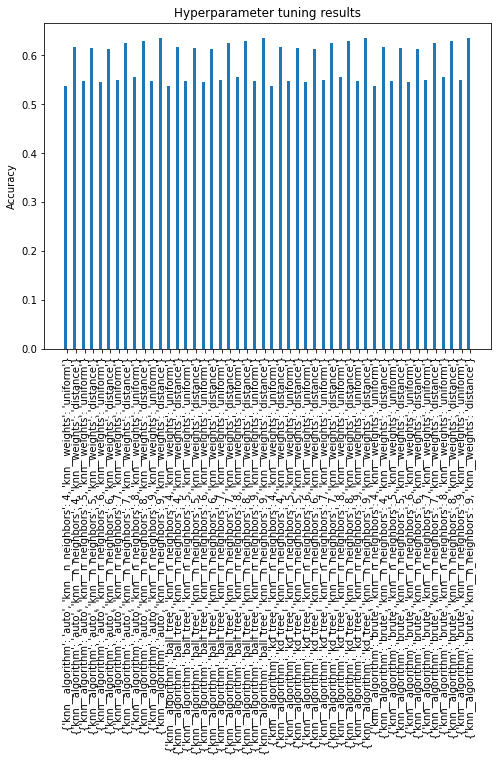

In [77]:
# Extract the scores and hyperparameters
scores = knn.cv_results_['mean_test_score']
params = knn.cv_results_['params']

# Plot the scores for each hyperparameter combination
n_params = len(params)
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(n_params)
width = 0.35

rects1 = ax.bar(x - width/2, scores, width)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter tuning results')
ax.set_xticks(x)
ax.set_xticklabels(params, rotation=90)

plt.tight_layout()
plt.show()

# ANN

ANN model made with MLP library rejected due to high inaccuracy 

In [78]:
#We also ran an Artificial Neural Network (ANN) using the Multi-Layer Perceptron Model libraries (MLPClassifier) in sklearn. We found that the 
# accuracy of classification of the model on the wine dataset never exceeds 65-67% with the data manipulation methods and hyperparameter tuning we 
# are doing with the allowed libraries (sklearn and other supporting python libraries). Since this result of ANN is very unsatisfactory, we have
# decided to not use it as our reporting classification model. However, we have provided the code as an appendix to the report to show our efforts
# in finding the classification model best suited based on accuracy for the given UCI wine dataset.
# scores=[]

# #standardize

# layers=list(range(5,300, 5))

# for i in layers:
    

#     mlp=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(i,), alpha=1e-2, max_iter = 400, learning_rate_init = 0.1).fit(X, y)
    
#     y_pred=mlp.predict(X_test)
#     scores.append(mlp.score(X_test, y_test))
#     #scores.append(mean_squared_error(y_pred, y_test))


# # Define the ANN model with default parameters
# ann_model = MLPClassifier()

# # Define the hyperparameters and their possible values for the Random Forest Classifier

# mlp_hyperparameters = {
#     # 'n_estimators': [100, 500, 1000],
#     # 'max_depth': [5, 10, 15, 20],
#     # 'max_features': ['sqrt', 'log2'],
#     # 'bootstrap': [True, False],

#     'hidden_layer_sizes' : [(50,),(20,),(100,),(200,),(500,),(1000,)],
#     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#     'solver':['lbfgs', 'sgd', 'adam'],
#     'alpha':[0.000005,0.00001,0.0003,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.03],
#     'learning_rate' : ['constant', 'invscaling', 'adaptive'],
#     'learning_rate_init' : [0.0001,0.0002,0.0005,0.003,0.001,0.002,0.005,0.01]

# }


# # Define the RandomizedSearchCV with the Random Forest Classifier
# mlp_random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=mlp_hyperparameters, n_iter=108)

# # Fit the RandomizedSearchCV to the ANN model
# mlp_random_search.fit(X_train, y_train)

# # Print the best set of hyperparameters
# print(mlp_random_search.best_params_)

# # Set the best set of hyperparameters to the ANN model
# ann_model.set_params(**mlp_random_search.best_params_)

# # Train the ANN model with the best set of hyperparameters
# ann_model.fit(X_train, y_train)

# # mlp_best=ann_model.fit(X_train, y_train)
    
# y_pred=ann_model.predict(X_test)
# ann_best_scores=ann_model.score(X_test, y_test)
# print(ann_best_scores)

In [79]:
# # Define the ANN model with default parameters
# ann_model = MLPClassifier()

# # Define the hyperparameters and their possible values for the Random Forest Classifier

# mlp_hyperparameters = {
#     # 'n_estimators': [100, 500, 1000],
#     # 'max_depth': [5, 10, 15, 20],
#     # 'max_features': ['sqrt', 'log2'],
#     # 'bootstrap': [True, False],

#     'hidden_layer_sizes' : [(50,),(20,),(100,),(200,),(500,),(1000,)],
#     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#     'solver':['lbfgs', 'sgd', 'adam'],
#     'alpha':[0.000005,0.00001,0.0003,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.03],
#     'learning_rate' : ['constant', 'invscaling', 'adaptive'],
#     'learning_rate_init' : [0.0001,0.0002,0.0005,0.003,0.001,0.002,0.005,0.01]

# }


# # Define the RandomizedSearchCV with the Random Forest Classifier
# mlp_random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=mlp_hyperparameters, n_iter=108)

# # Fit the RandomizedSearchCV to the ANN model
# mlp_random_search.fit(X_train, y_train)

# # Print the best set of hyperparameters
# print(mlp_random_search.best_params_)

# # Set the best set of hyperparameters to the ANN model
# ann_model.set_params(**mlp_random_search.best_params_)

# # Train the ANN model with the best set of hyperparameters
# ann_model.fit(X_train, y_train)

# # mlp_best=ann_model.fit(X_train, y_train)
    
# y_pred=ann_model.predict(X_test)
# ann_best_scores=ann_model.score(X_test, y_test)
# print(ann_best_scores)

In [80]:
# layers[scores.index(max(scores))]

In [81]:
# max(scores)

In [82]:
# #Similar to our decision of not using ANN for our final model, we also decided to not use Support Vector Machine Classification (SVC library), 
# #using the same process of running the scaled data for hyperparameterization and cross validation within the model. As expected, we did this 
# # process for all 4 of the popular SVM kernels taught and provided in SVC library that is: linear, polynomial, rbf, and sigmoid. None of the 
# # kernels gave us any considerable results due to very low accuracy scores. These accuracy scores of SVM were remarkably low at mere 43.3333%. 
# # Hence, we decided to not use as our classification model.  


# kernels=['linear','poly','rbf','sigmoid']

# test_accuracies=[]

# svc = SVC(kernel='sigmoid')
# svc.fit(X_train, y_train)

# svc.score(X_test, y_test)
# #y_pred=svc.predict(X_test)
# #mean_squared_error(y_pred, y_test)
    

In [83]:
df.var(0)

fixed acidity              3.031416
residual sugar             1.987897
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
alcohol                    1.135647
quality                    0.652168
dtype: float64